In [1]:
import numpy as np
import pandas as pd # data frame
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno # null data를 보여줌

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [3]:
df_train.head(10) # default = 5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
for col in df_train.columns:
    msg = f'column : {col:>10}\t Percent of NaN value: {100*(df_train[col].isnull().sum()/df_train[col].shape[0]):.2f}%'
    print(msg)

column : PassengerId	 Percent of NaN value: 0.00%
column :   Survived	 Percent of NaN value: 0.00%
column :     Pclass	 Percent of NaN value: 0.00%
column :       Name	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column :        Age	 Percent of NaN value: 19.87%
column :      SibSp	 Percent of NaN value: 0.00%
column :      Parch	 Percent of NaN value: 0.00%
column :     Ticket	 Percent of NaN value: 0.00%
column :       Fare	 Percent of NaN value: 0.00%
column :      Cabin	 Percent of NaN value: 77.10%
column :   Embarked	 Percent of NaN value: 0.22%


In [9]:
for col in df_test.columns:
    msg = f'column : {col:>10}\t Percent of NaN value: {100*(df_test[col].isnull().sum()/df_test[col].shape[0]):.2f}%'
    print(msg)

column : PassengerId	 Percent of NaN value: 0.00%
column :     Pclass	 Percent of NaN value: 0.00%
column :       Name	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column :        Age	 Percent of NaN value: 20.57%
column :      SibSp	 Percent of NaN value: 0.00%
column :      Parch	 Percent of NaN value: 0.00%
column :     Ticket	 Percent of NaN value: 0.00%
column :       Fare	 Percent of NaN value: 0.24%
column :      Cabin	 Percent of NaN value: 78.23%
column :   Embarked	 Percent of NaN value: 0.00%


In [10]:
df_train[col]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [11]:
df_train[col].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [12]:
df_train[col].isnull().sum()

2

In [13]:
df_train[col].shape

(891,)

In [14]:
df_train[col].isnull().sum() / df_train[col].shape[0]

0.002244668911335578

<AxesSubplot:>

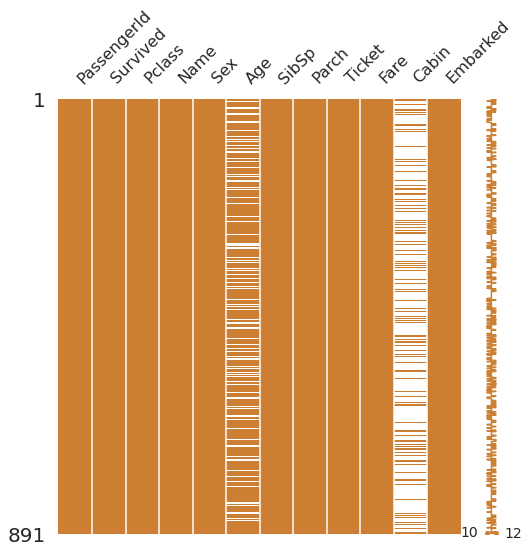

In [15]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2)) # 분포를 확인 할 수 있다.

In [16]:
df_train.iloc[:, 1]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<AxesSubplot:>

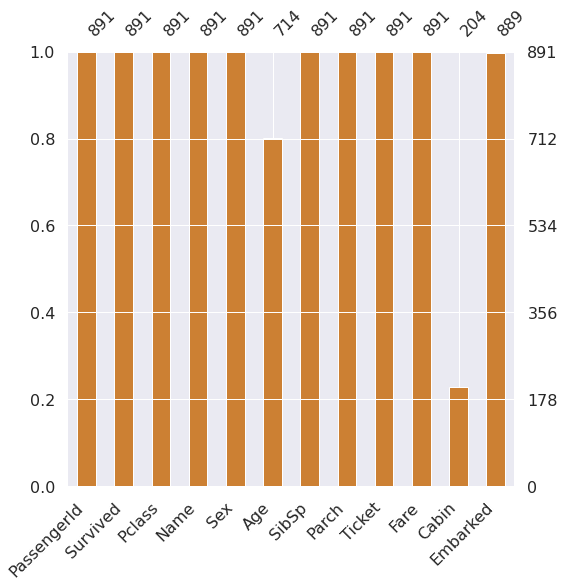

In [17]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2)) # 개수를 대략적으로 확인할 수 있음

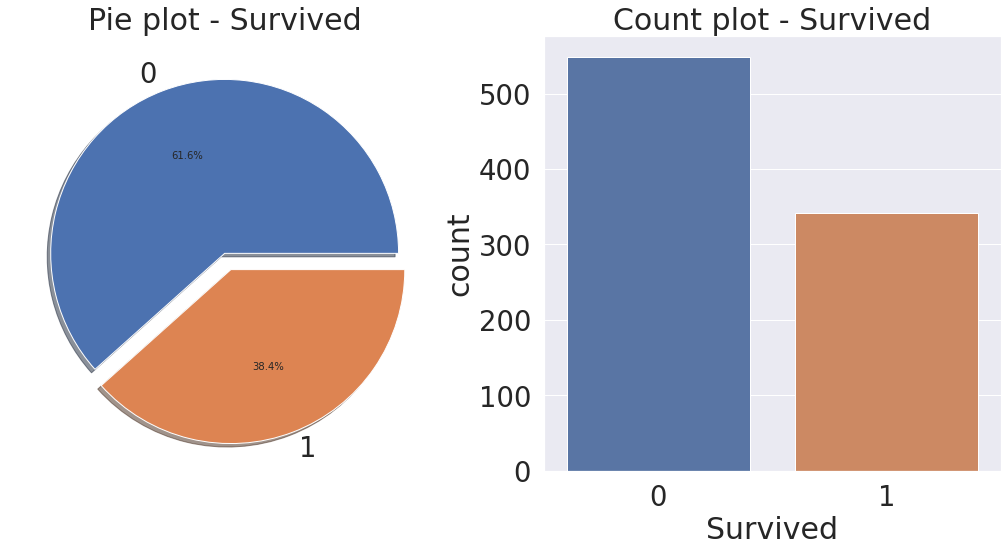

In [18]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived']. value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

In [19]:
df_train['Survived']. value_counts()

0    549
1    342
Name: Survived, dtype: int64

## 2.1 Pclass

In [20]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


### Pclass가 1일 때, 136명의 생존자/ 2일 때 87명/ 3일 때119명

In [21]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [22]:
df_train['Survived'].unique()

array([0, 1])

In [23]:
# margins : all column을 추가.
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='Blues')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

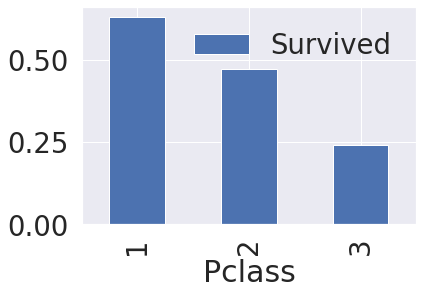

In [24]:
# as_index : Pclass를 index로 한다.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

<AxesSubplot:>

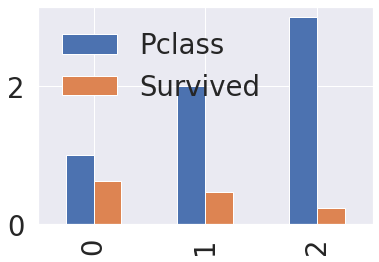

In [25]:
# as_index가 False이면 두개가 모두 출력 된다.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False).plot.bar()

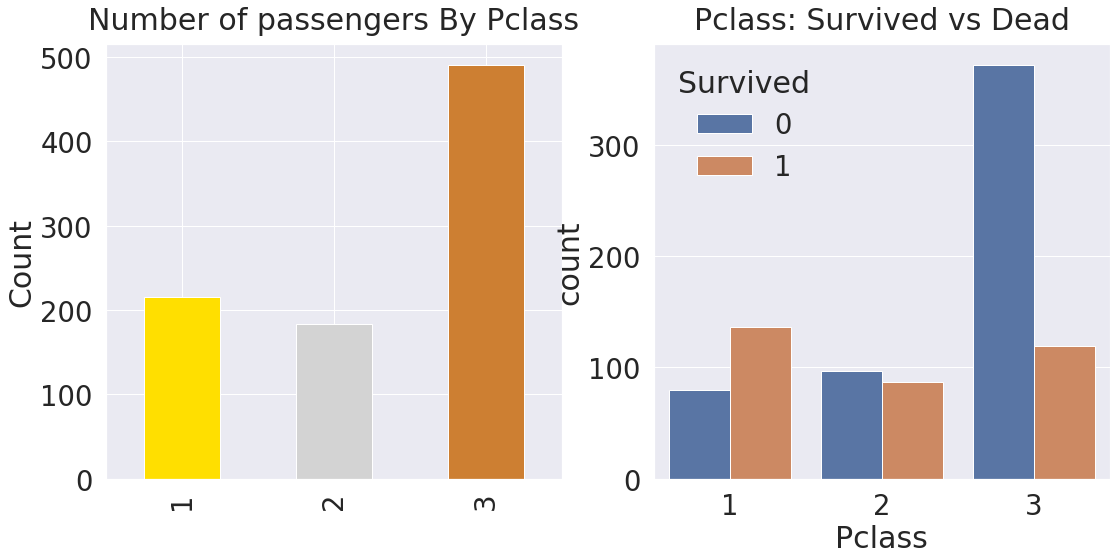

In [26]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

## 2.2 sex

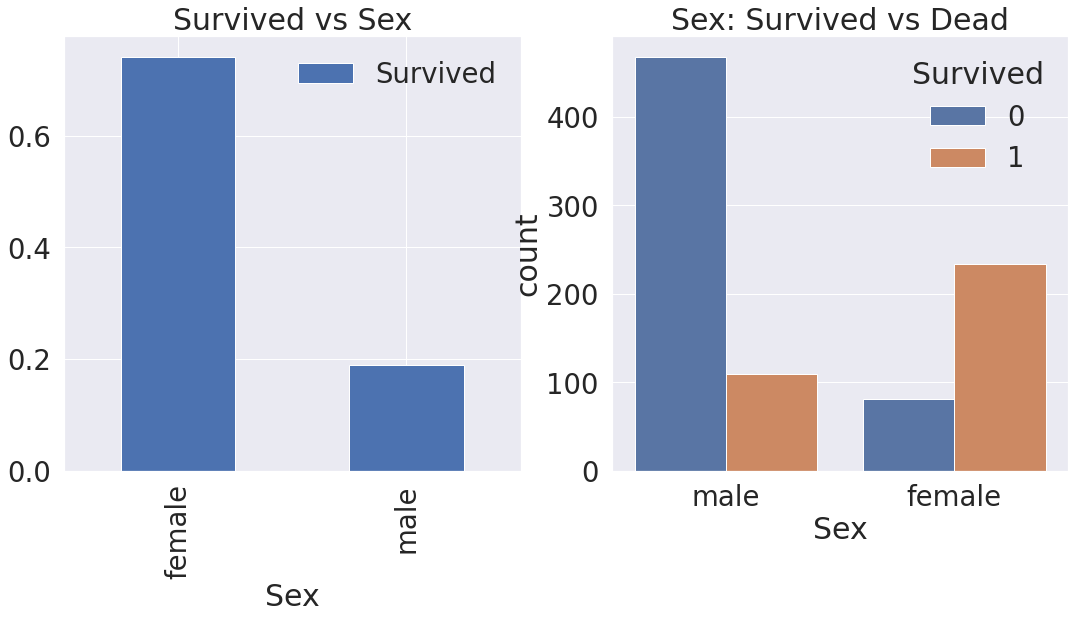

In [27]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

<AxesSubplot:xlabel='Sex'>

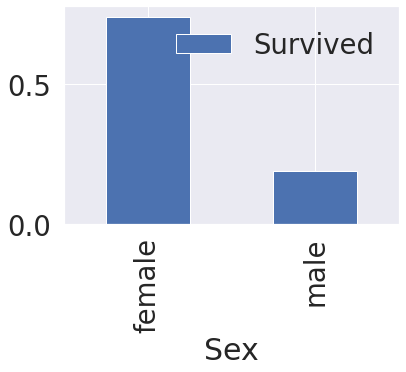

In [28]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar()

In [29]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [30]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.2 Both Sex and Pclass

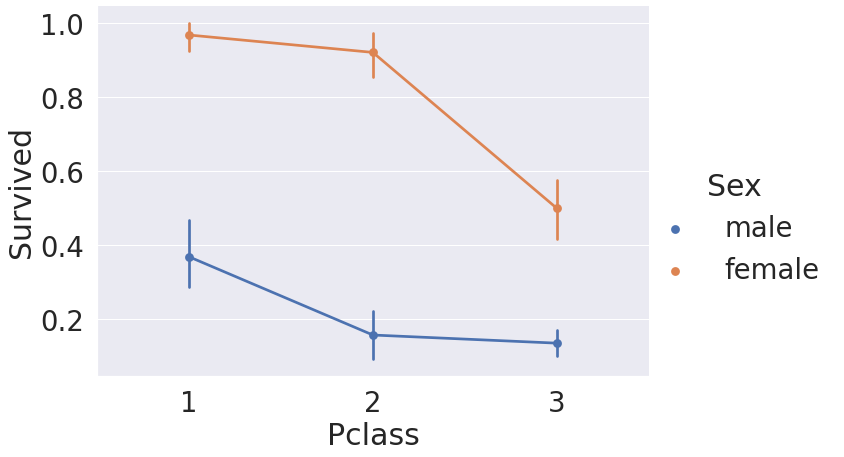

In [31]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

- Lady first,
- Money brings survival?

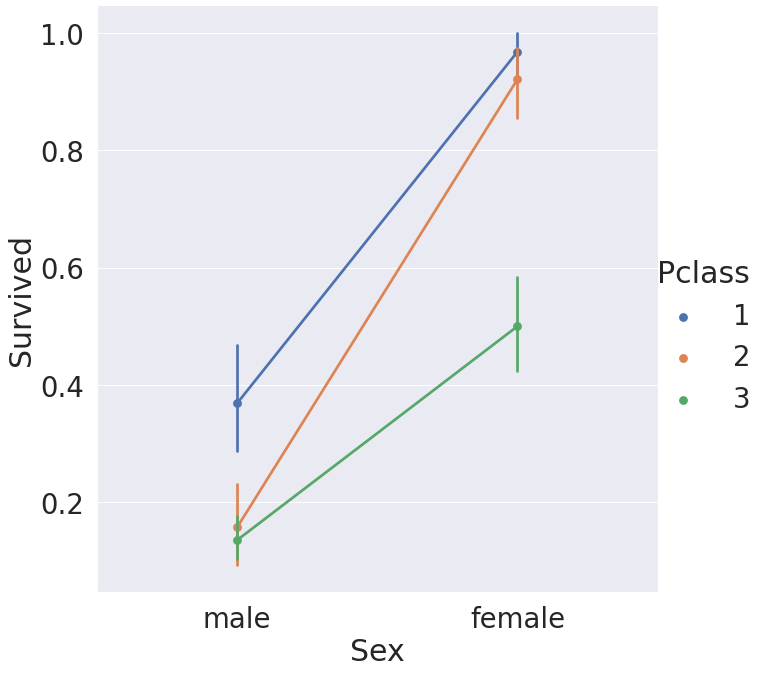

In [32]:
sns.factorplot(x='Sex', y='Survived', hue='Pclass', data=df_train, saturation=5, size=9, aspect=1)

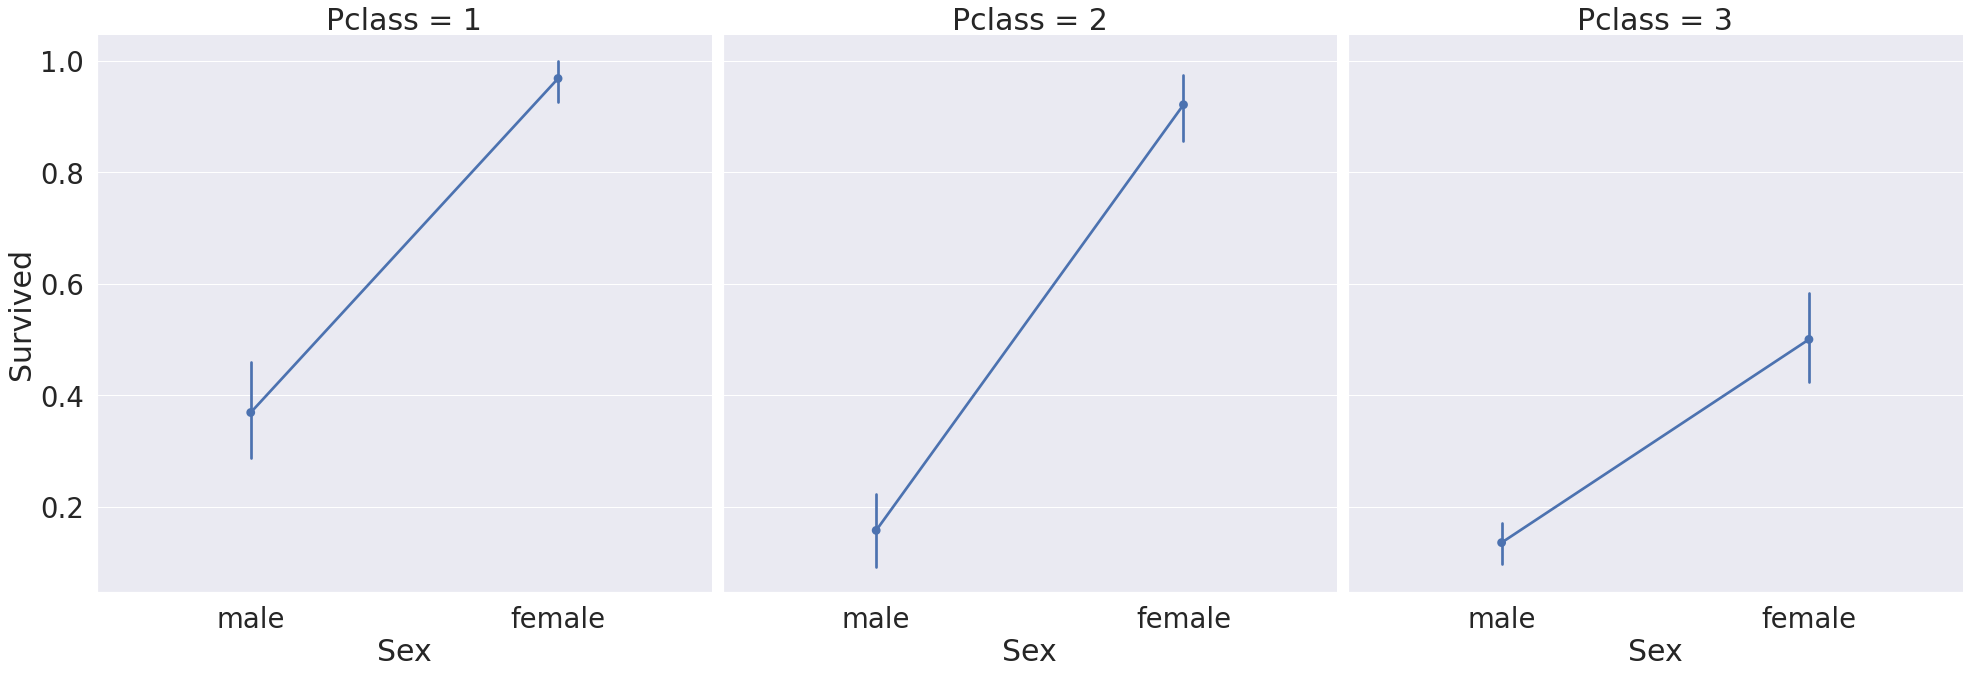

In [33]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, saturation=5, size=9, aspect=1)

## Age

In [34]:
print(f"제일 나이 많은 탑승객: {df_train['Age'].max():.1f} years.")
print(f"제일 어린 탑승객: {df_train['Age'].min():.1f} years.")
print(f"탑승객 평균 나이: {df_train['Age'].mean():.1f} years.")

제일 나이 많은 탑승객: 80.0 years.
제일 어린 탑승객: 0.4 years.
탑승객 평균 나이: 29.7 years.


### kdeplot : 데이터 분포를 그려주는 함수

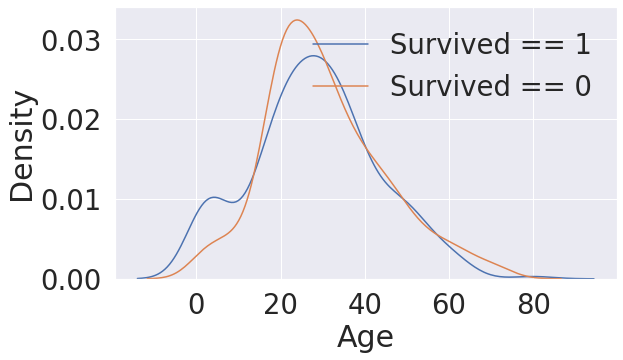

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

### hist로 보면 아래와 같고 위의 파란선과 분포가 비슷하다.

<AxesSubplot:>

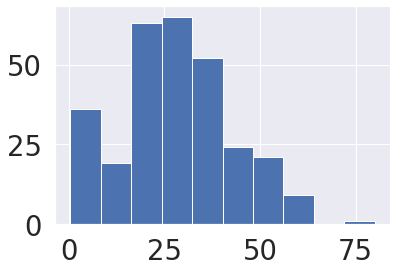

In [36]:
df_train[df_train['Survived'] == 1]['Age'].hist()

### 다양한 indexing

In [37]:
df_train.iloc[0, :]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                              22.00
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [38]:
for row in df_train.iterrows():
    break
row

(0,
 PassengerId                          1
 Survived                             0
 Pclass                               3
 Name           Braund, Mr. Owen Harris
 Sex                               male
 Age                              22.00
 SibSp                                1
 Parch                                0
 Ticket                       A/5 21171
 Fare                              7.25
 Cabin                              NaN
 Embarked                             S
 Name: 0, dtype: object)

In [39]:
df_train[df_train['Survived'] == 1]['Age']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

## 다양하게 그래프 그리는 법

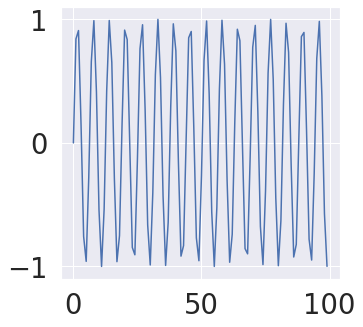

In [40]:
f = plt.figure(figsize=(5, 5))
a = np.arange(100)
b = np.sin(a)
plt.plot(b)

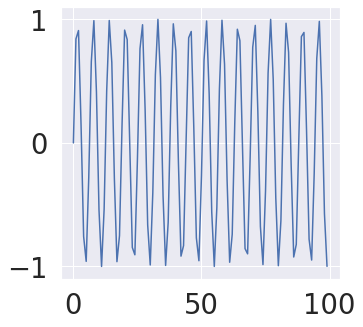

In [41]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))
a = np.arange(100)
b = np.sin(a)
ax.plot(b)

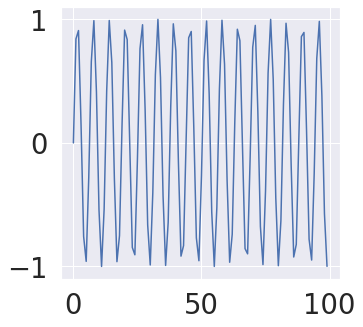

In [42]:
plt.figure(figsize=(5, 5))
a = np.arange(100)
b = np.sin(a)
plt.plot(b)

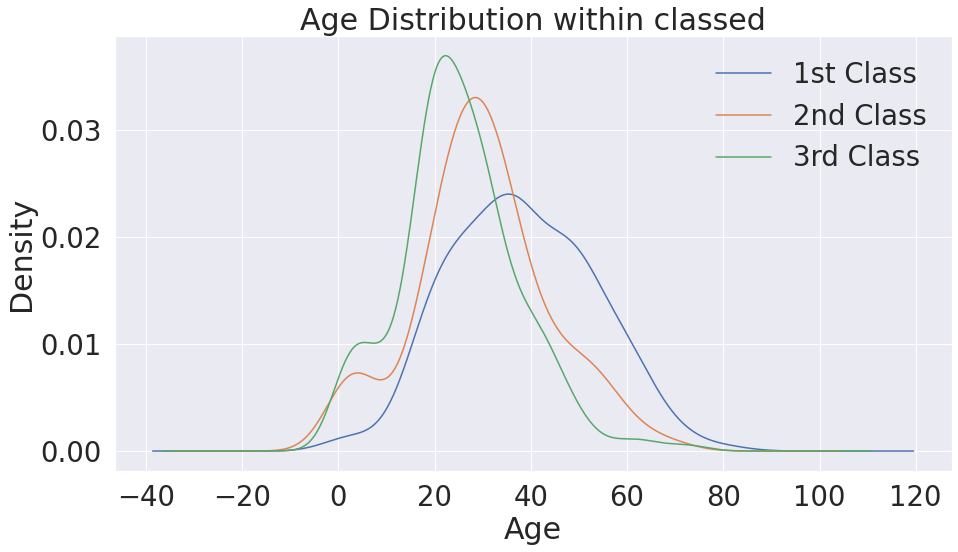

In [43]:
plt.figure(figsize=(15, 8))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classed')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

### hist로 하면 안보인다..

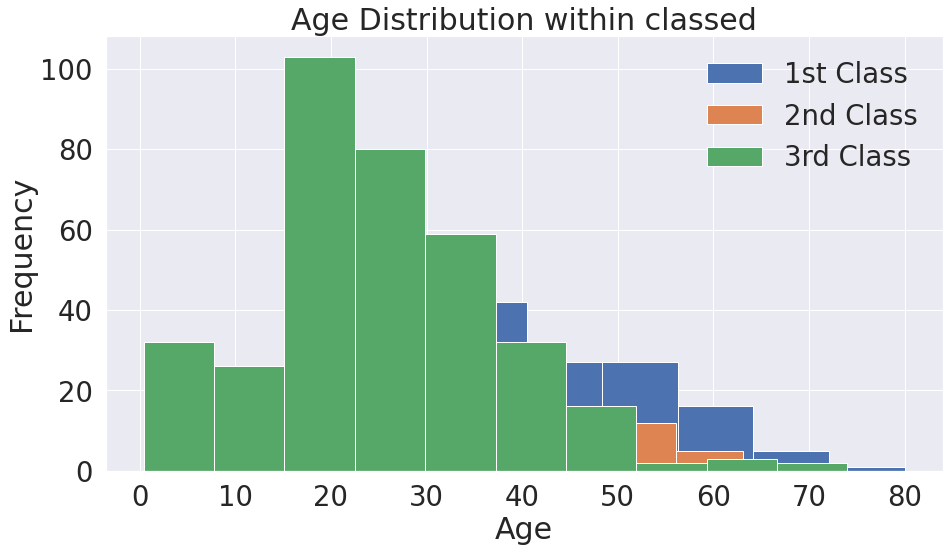

In [44]:
plt.figure(figsize=(15, 8))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='hist')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='hist')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='hist')

plt.xlabel('Age')
plt.title('Age Distribution within classed')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

### 생존확률을 보려면 아래와 같이 작성

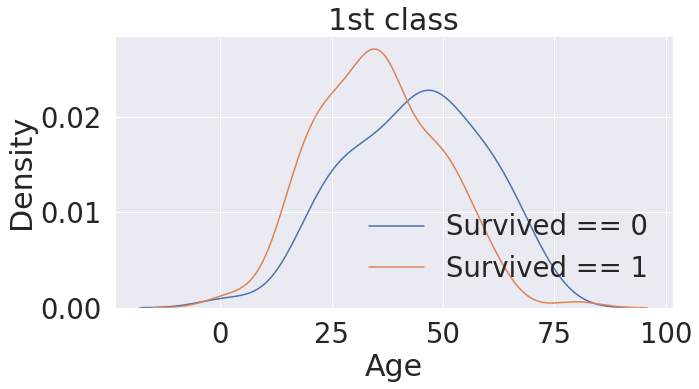

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
plt.title('1st class')
plt.legend(['Survived == 0', 'Survived == 1'])
plt.show()


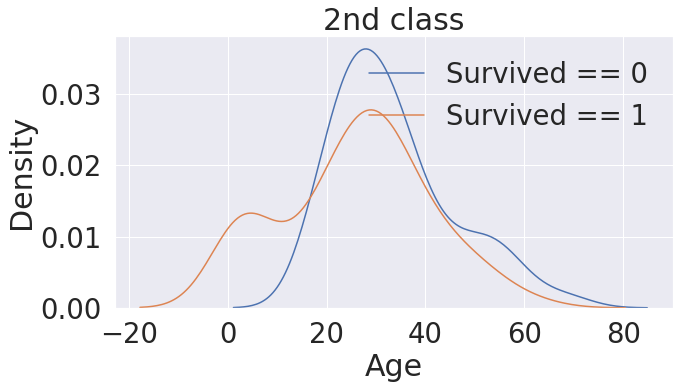

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
plt.title('2nd class')
plt.legend(['Survived == 0', 'Survived == 1'])
plt.show()


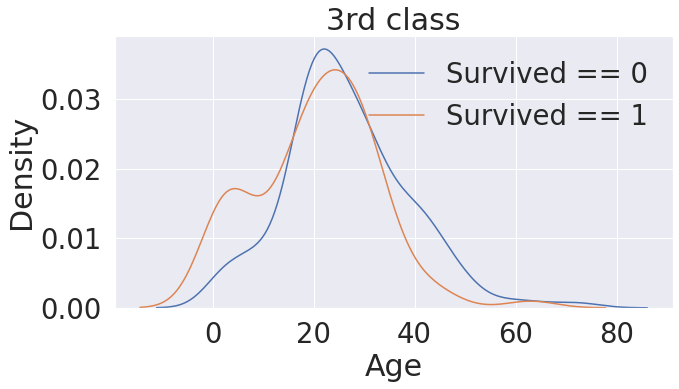

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
plt.title('3rd class')
plt.legend(['Survived == 0', 'Survived == 1'])
plt.show()


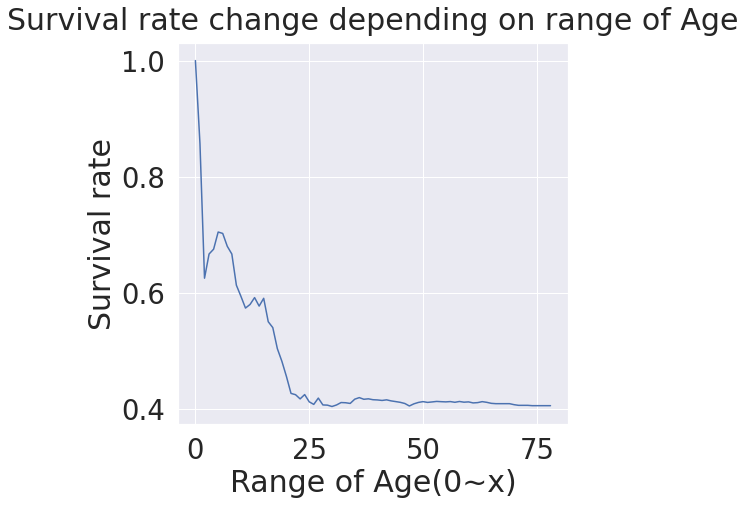

In [48]:
# 1~80세까지의 생존률

change_age_range_survival_ratio = []
for i in range(1, 80):
    change_age_range_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

In [49]:
# i = 10일 때, 아래 코드는 10살보다 적은 아이들의 생존률이다.

i = 10
df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived'])

0.6129032258064516

In [50]:
len(df_train[df_train['Age'] < i]['Survived'])

62

# violinplot

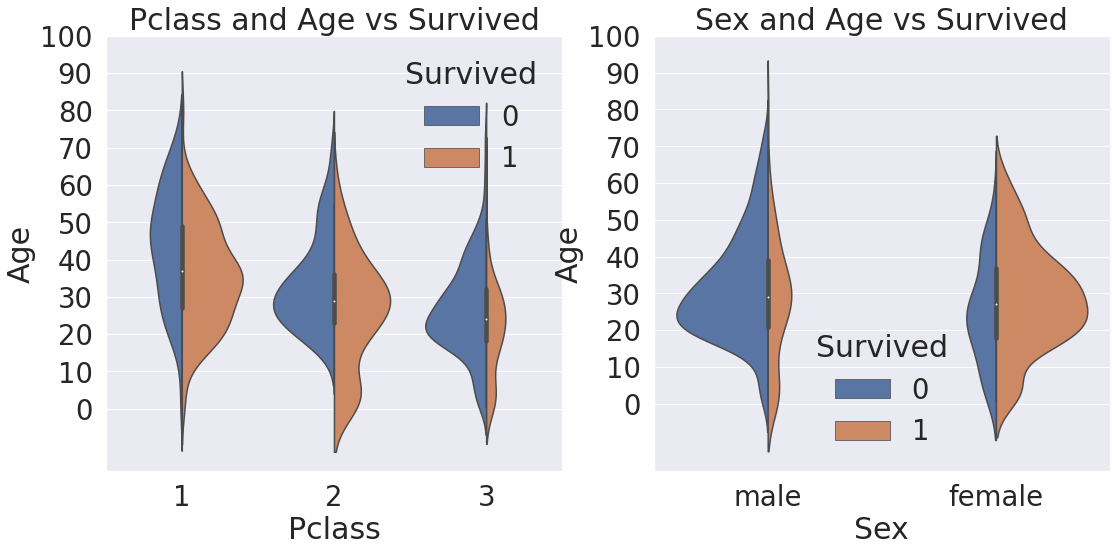

In [51]:
f, ax = plt.subplots(1, 2, figsize =(18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data=df_train, scale="count", split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue="Survived", data=df_train, scale="count", split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0, 110, 10))

plt.show()

# Embarked

<AxesSubplot:xlabel='Embarked'>

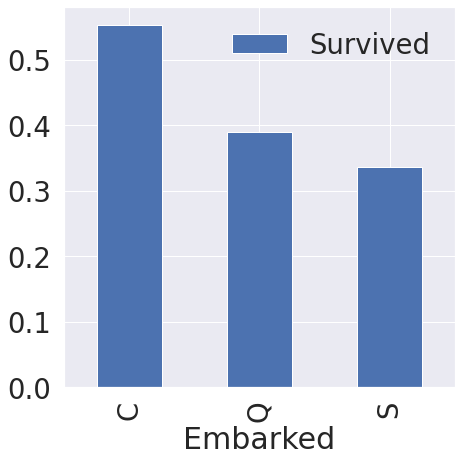

In [52]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[["Embarked", "Survived"]].groupby(["Embarked"], as_index=True).mean().sort_values(by="Survived", ascending=False).plot.bar(ax=ax)

In [53]:
# index로 정렬도 가능하다.
df_train[["Embarked", "Survived"]].groupby(["Embarked"], as_index=True).mean().sort_index()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [54]:
# 오름 차순 정렬도 가능
df_train[["Embarked", "Survived"]].groupby(["Embarked"], as_index=True).mean().sort_values(by="Survived", ascending=True)

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


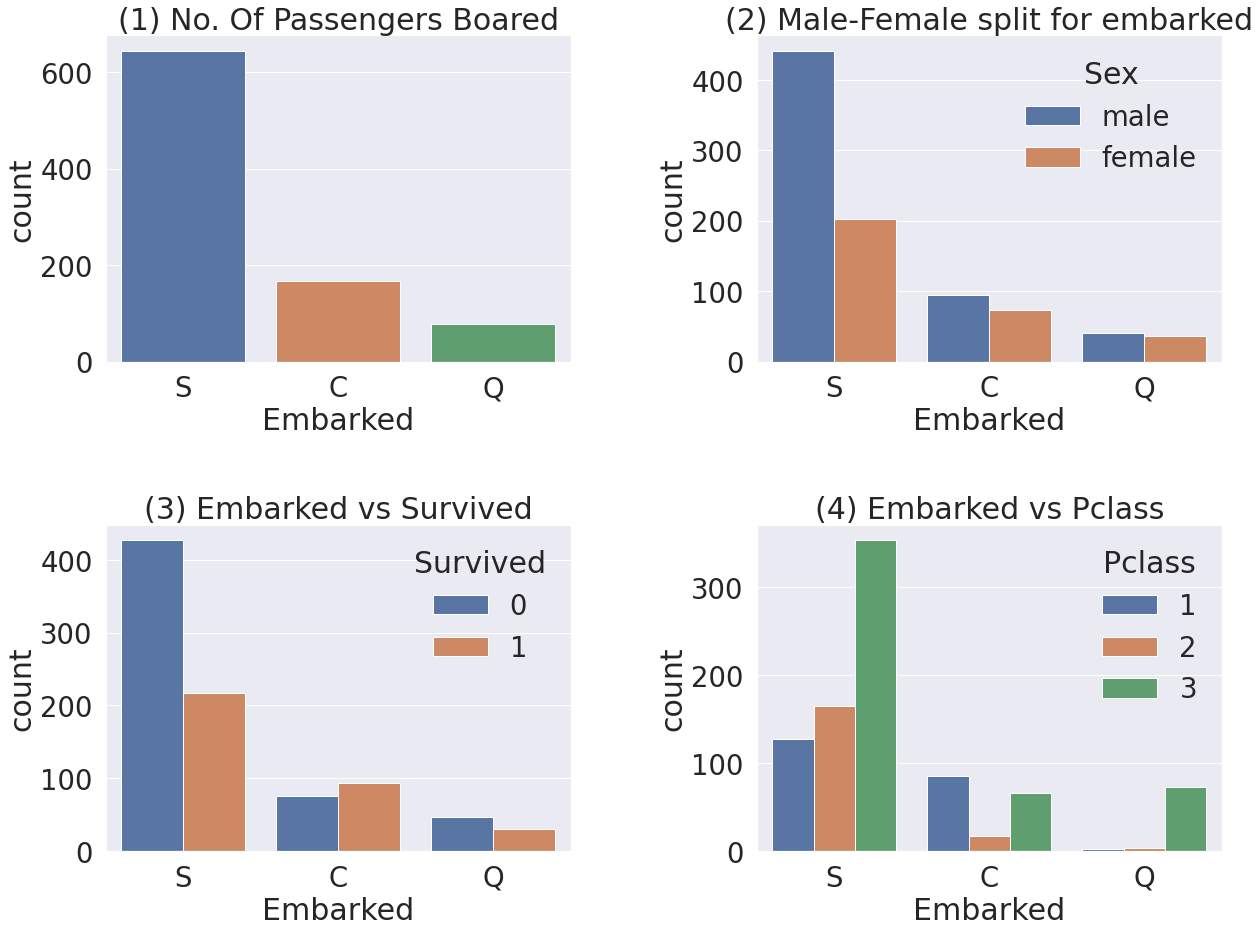

In [55]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot("Embarked", data=df_train, ax=ax[0, 0])

ax[0, 0].set_title("(1) No. Of Passengers Boared")

sns.countplot("Embarked", hue="Sex", data=df_train, ax=ax[0, 1])
ax[0, 1].set_title("(2) Male-Female split for embarked")

sns.countplot("Embarked", hue="Survived", data=df_train, ax=ax[1, 0])
ax[1, 0].set_title("(3) Embarked vs Survived")

sns.countplot("Embarked", hue="Pclass", data=df_train, ax=ax[1, 1])
ax[1, 1].set_title("(4) Embarked vs Pclass")

plt.subplots_adjust(wspace=0.4, hspace=0.5) # subplot간의 간격
plt.show()

# Family = SibSp + Parch

In [56]:
df_train["SibSp"]

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

In [57]:
df_train["Parch"]

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [58]:
# 자신도 포함해야 하므로 +1
df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1
df_train["FamilySize"]

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

In [59]:
print("Maximum size of Family: ", df_train["FamilySize"].max())
print("Minimum size of Family: ", df_train["FamilySize"].min())

Maximum size of Family:  11
Minimum size of Family:  1


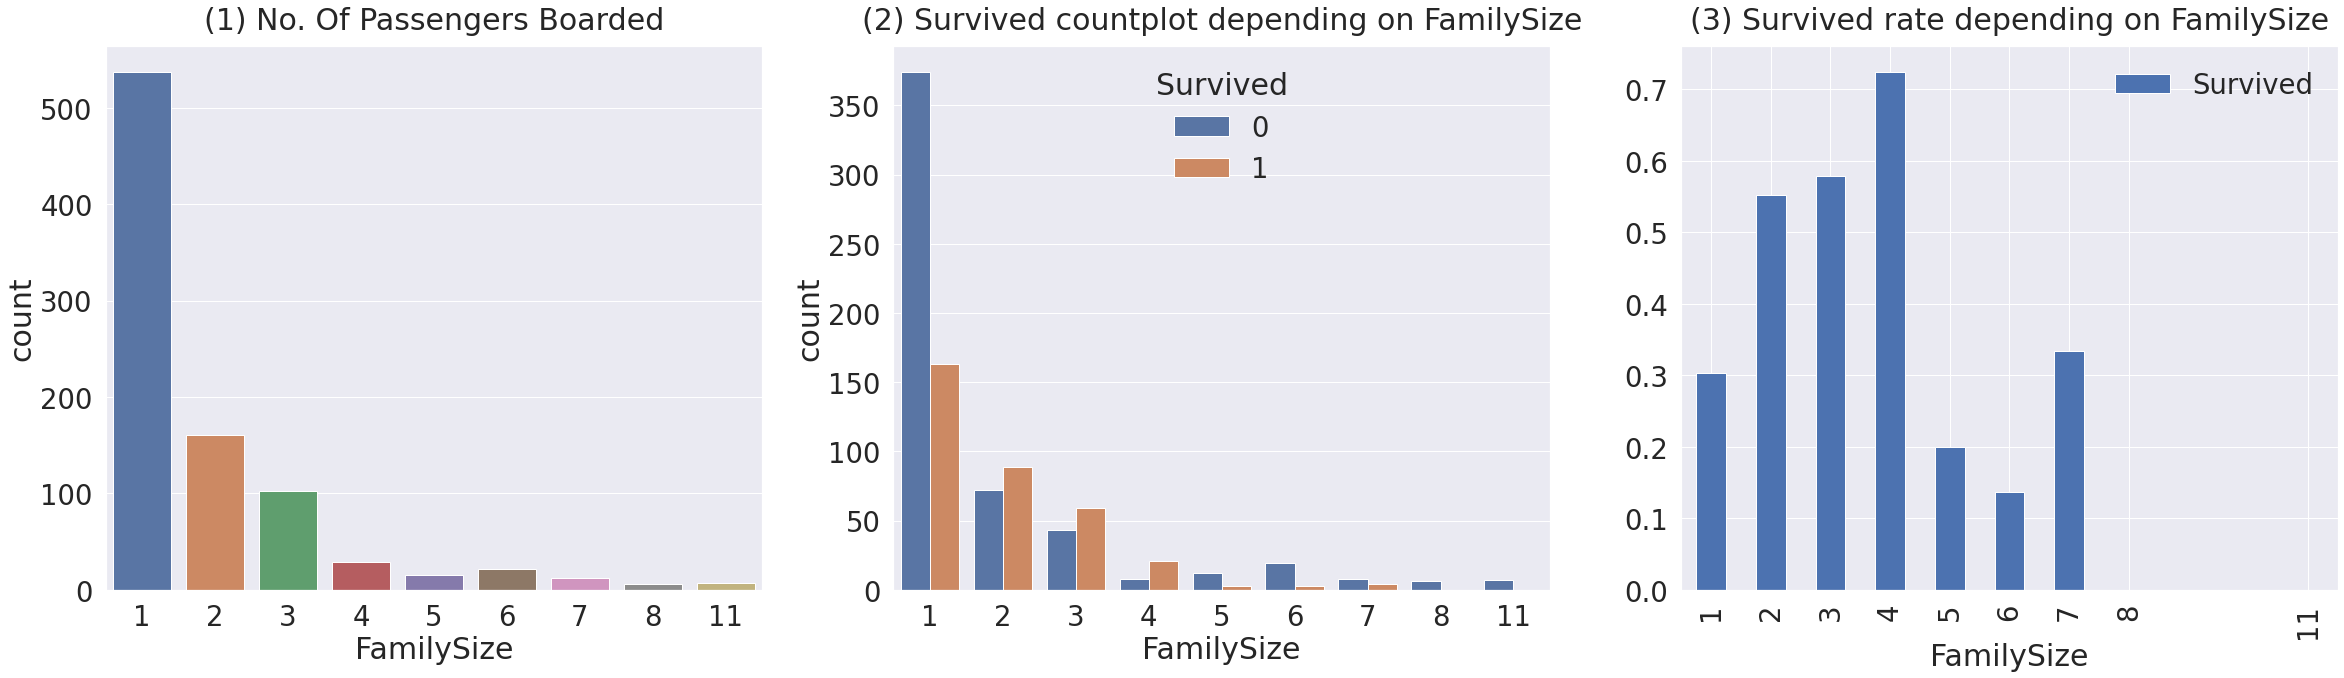

In [60]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

# 얘 왜 정렬안됨?
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Fare

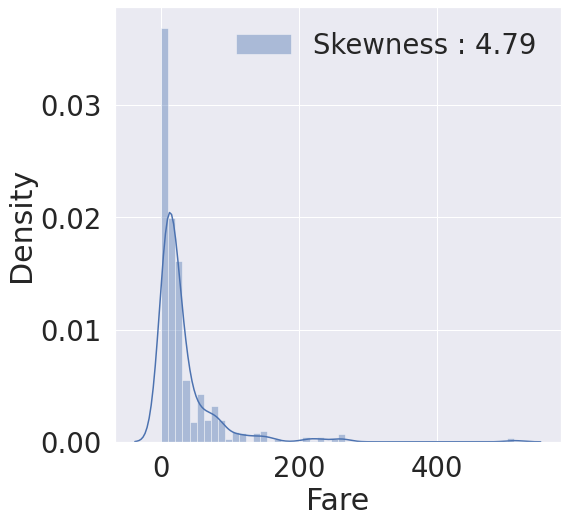

In [61]:
# Skewness 값이 클수록 왼쪽으로 치우친 분포. 기준 값은 0이다.

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [62]:
# Fare에 log를 취해주어서 Skewness를 0으로 근사시켜준다.
# model의 성능을 향상시키기 위한 Feature Engineering

df_train["Fare"] = df_train["Fare"].map(lambda i: np.log(i) if i>0 else 0)

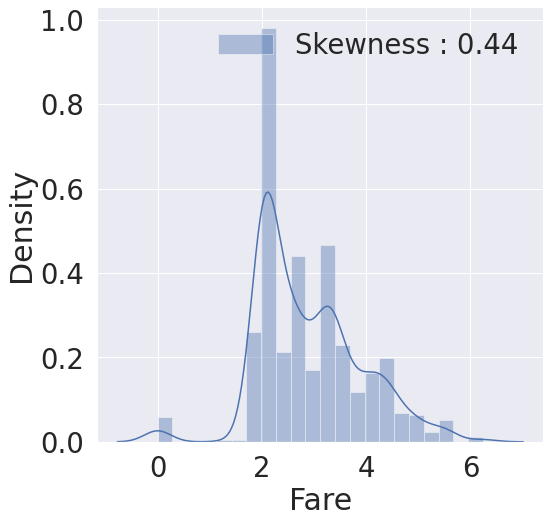

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

## Cabin은 Null 값이 80%이므로 중요한 정보를 얻을 수 없기 때문에 생략

# Ticket

In [64]:
# 종류가 다양해서 Feature Engineering으로 넘어가야 한다.
df_train["Ticket"].value_counts()

1601             7
347082           7
CA. 2343         7
CA 2144          6
3101295          6
                ..
248731           1
345767           1
PC 17595         1
SC/PARIS 2149    1
315097           1
Name: Ticket, Length: 681, dtype: int64

In [65]:
# null값들을 채워 주어야 정확히 예측할 수 있다.
df_train['Age'].isnull().sum()

177

In [66]:
# 채우는 방법 중 하나가 평균 값으로 넣어주는 것이다. 하지만 이는 영 내키지 않는다.
# 예를 들어 나이가 3살인 사람과 57살인 두 사람의 평균도 30살이기 때문이다.
# 그래도 일단 그냥 넣어서 해보자..
df_train['Age'].mean()

29.69911764705882

In [67]:
# 정규 표현식을 적용시켜서 추출해준다. (모든 알파벳 + '.' 을 추출해준다 예를 들어 Mr. Mrs. Miss. 등등..)
df_train['Name'].str.extract('([A-Za-z]+)\.')

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [68]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

In [69]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [70]:
df_train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],
                            ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [71]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<AxesSubplot:xlabel='Initial'>

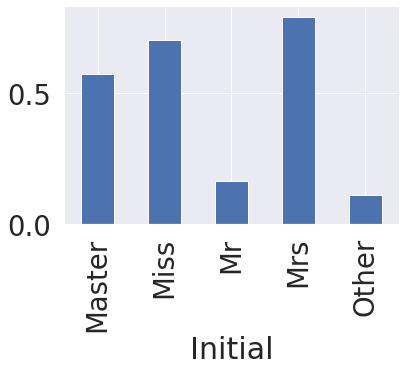

In [72]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

## null을 채울 때 train set에서 얻은 통계치를 가지고 test에도 채워주어야 한다.

In [73]:
df_train.loc[1, :]

PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                    38.000000
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17599
Fare                                                    4.266662
Cabin                                                        C85
Embarked                                                       C
FamilySize                                                     2
Initial                                                      Mrs
Name: 1, dtype: object

In [74]:
df_train.iloc[1, 2:] #iloc를 사용하면 열도 지정해서 출력할 수 있다.

Pclass                                                        1
Name          Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                      female
Age                                                   38.000000
SibSp                                                         1
Parch                                                         0
Ticket                                                 PC 17599
Fare                                                   4.266662
Cabin                                                       C85
Embarked                                                      C
FamilySize                                                    2
Initial                                                     Mrs
Name: 1, dtype: object

In [75]:
# Initial이 Mr인 사람 중 나이가 null이면 33으로(평균 값) 값을 채워준다.
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] = 33

df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mrs'), 'Age'] = 36
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Master'), 'Age'] = 5
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Miss'), 'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Other'), 'Age'] = 46

df_test.loc[(df_train['Age'].isnull()) & (df_test['Initial'] == 'Mr'), 'Age'] = 33
df_test.loc[(df_train['Age'].isnull()) & (df_test['Initial'] == 'Mrs'), 'Age'] = 36
df_test.loc[(df_train['Age'].isnull()) & (df_test['Initial'] == 'Master'), 'Age'] = 5
df_test.loc[(df_train['Age'].isnull()) & (df_test['Initial'] == 'Miss'), 'Age'] = 22
df_test.loc[(df_train['Age'].isnull()) & (df_test['Initial'] == 'Other'), 'Age'] = 46

In [76]:
# null 값이 채워진 것을 볼 수 있다.
df_train.loc[(df_train['Initial'] == 'Mr'), 'Age'].isnull().sum()

0

In [77]:
# 빈칸이 두개 밖에 없다.
df_train['Embarked'].isnull().sum()

2

In [78]:
df_train.shape

(891, 14)

In [79]:
# 가장 많이 등장하는 S로 채워주어도 될 것 같다.
df_train['Embarked'].fillna('S', inplace=True)

In [80]:
df_train['Embarked'].isnull().sum()

0

In [81]:
df_train['Age_cat'] = 0

In [82]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,0


In [83]:
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[(70 <= df_train['Age']), 'Age_cat'] = 7

In [84]:
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[(70 <= df_test['Age']), 'Age_cat'] = 7

In [85]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


## 위 방법을 쉽게 하는 방법이 apply를 사용하는 것이다.

In [86]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [87]:
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [88]:
(df_train['Age_cat'] == df_train['Age_cat_2']).all()

True

In [89]:
# 이제 필요 없는 것들을 삭제해준다.
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

In [90]:
df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [91]:
# int 형태로 만들어 주기 위함.
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [92]:
df_train.Embarked.unique() # numpy ndarray

array(['S', 'C', 'Q'], dtype=object)

In [93]:
df_train['Embarked'].value_counts() # series

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [94]:
# 얘도 str이니까 int로 바꿔준다. 모델의 입력으로 사용하기 위해!
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [95]:
# Embarked와 Initial이 int로 바뀐 것을 볼 수 있다.
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,2,1,2,3


In [96]:
df_train.Embarked.isnull().any() # True가 하나라도 있으면 True 반환.
# df_train.Embarked.isnull().sum() 으로 확인 해도 됨.

False

In [97]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [98]:
# 얘도 str -> int
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [99]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

In [100]:
heatmap_data.corr()

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_cat
Survived,1.000000,-0.338481,-0.543351,0.331805,-0.167675,0.016639,-0.085529,-0.095002
Pclass,-0.338481,1.000000,0.131900,-0.670489,0.162098,0.065997,-0.133054,-0.314809
Sex,-0.543351,0.131900,1.000000,-0.264751,0.108262,-0.200988,0.051687,0.122917
Fare,0.331805,-0.670489,-0.264751,1.000000,-0.199932,0.389193,-0.019889,0.077791
Embarked,-0.167675,0.162098,0.108262,-0.199932,1.000000,0.066516,0.026550,-0.033173
FamilySize,0.016639,0.065997,-0.200988,0.389193,0.066516,1.000000,-0.204574,-0.280537
Initial,-0.085529,-0.133054,0.051687,-0.019889,0.026550,-0.204574,1.000000,0.481309
Age_cat,-0.095002,-0.314809,0.122917,0.077791,-0.033173,-0.280537,0.481309,1.000000


<AxesSubplot:title={'center':'Pearson Correalation of Features'}>

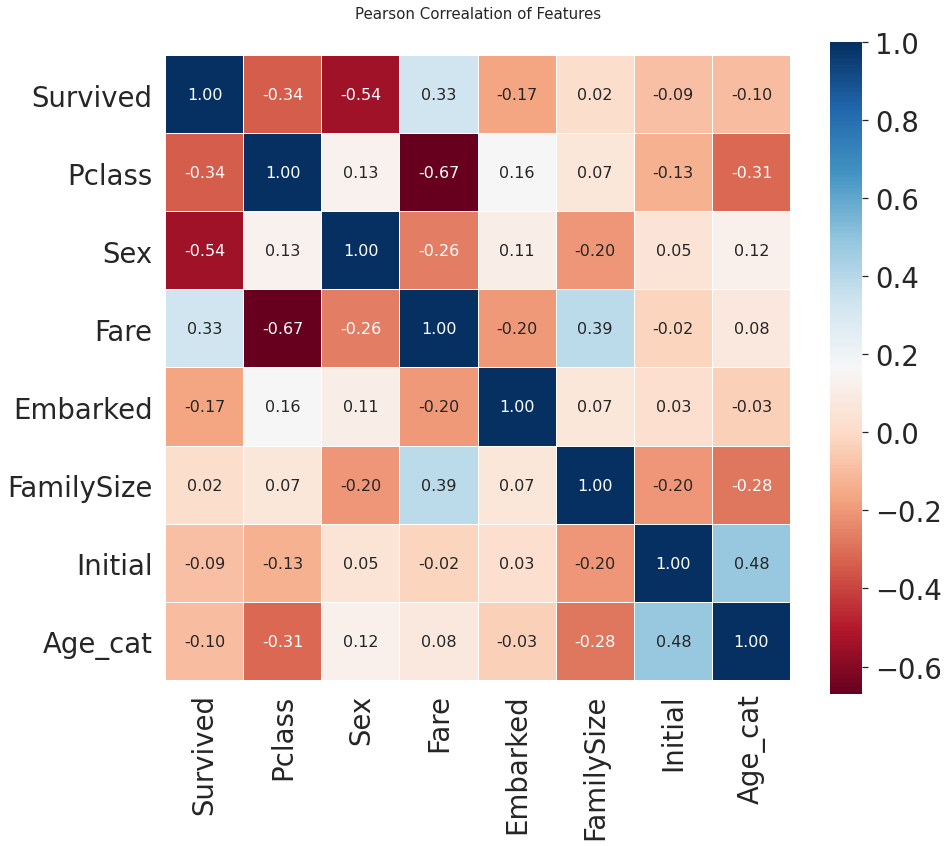

In [101]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title("Pearson Correalation of Features", y=1.05, size=15)
# linewidths: 각 칸 사이의 줄의 너비, vmax: 색의 변화, linecolor: 말 그대로 각 칸 사이의 line의 색깔
# annot: True이면 각 칸에 숫자가 나온다., fmt=.'1f'이런 방식으로 소수점 자리수를 조절할 수 있다.
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap,
           linecolor='white', annot=True, annot_kws={'size': 16}, fmt='.2f')

In [103]:
# pd.get_dummies로 간단하게 원핫인코딩을 할 수 있다.
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [105]:
# Embarked도 원핫인코딩을 해준다.
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [106]:
# 필요 없는 column들을 삭제해준다.
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [ ]:
df_train.head()